# Histograms

You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.

It is just another way of understanding the image. By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image. Almost all image processing tools today, provides features on histogram.

[Histograms - 1: Find, Plot, Analyze](https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html)

[Histograms - 2: Histogram Equalization](https://docs.opencv.org/4.x/de/db2/tutorial_py_table_of_contents_histograms.html)

## Importing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Loading the Image

Recall that Matplotlib expects the images in an RGB ordering vs BGR in OpenCV, so if we use OpenCV to calculate anything channel oriented, we'll want to make sure we keep the original BGR ordering, however if we ever want to display the image, then we'll need to convert to the RGB ordering that matplotlib wants.

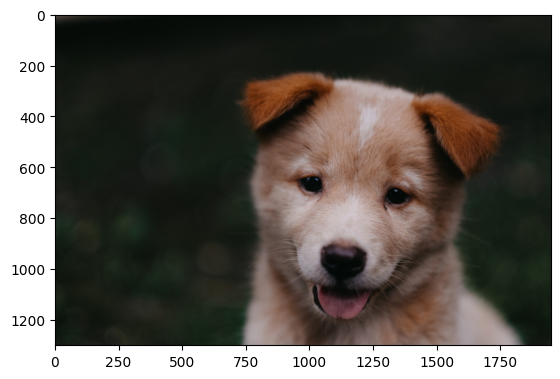

In [2]:
img = cv2.imread("../DATA/puppy.jpg")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)


## Find Histogram

We use `cv.calcHist` function to find the histogram.

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

* images: it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
* channels: it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
* mask: mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask.
* histSize: this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
* ranges: this is our RANGE. Normally, it is [0,256].

### Plot only one color histogram

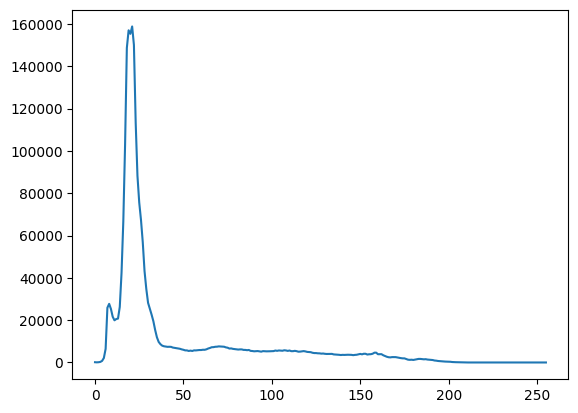

In [3]:
hist_values = cv2.calcHist([img], channels=[0], mask=None, histSize=[256], ranges=[0, 256]) # Only blue channel
plt.plot(hist_values)

### Plot three color histograms

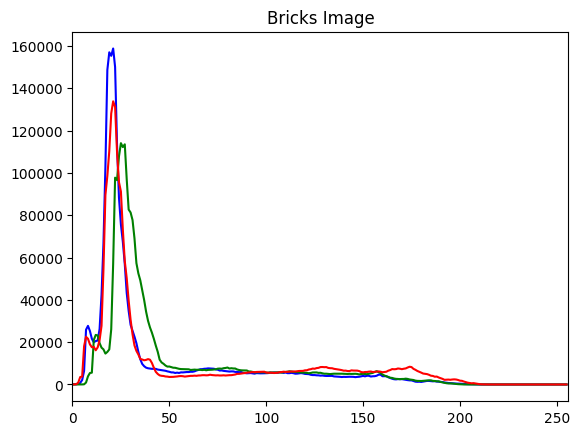

In [4]:
color = ("b", "g", "r")

for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
    
plt.title("Bricks Image")
plt.show()

### Mask the image

If we want to find histograms of some regions of an image, we need to create a mask image with white color on the region we want to find histogram and black otherwise. Then pass this as the mask.

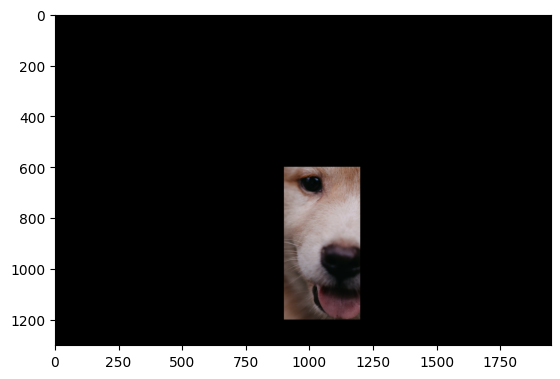

In [5]:
mask = np.zeros(img.shape[:2], np.uint8)
mask[600:1200, 900:1200] = 255

masked_img = cv2.bitwise_and(img, img, mask=mask)
rgb_masked_img = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)

plt.imshow(rgb_masked_img)

Text(0.5, 1.0, 'Histogram for RED values for the masked area')

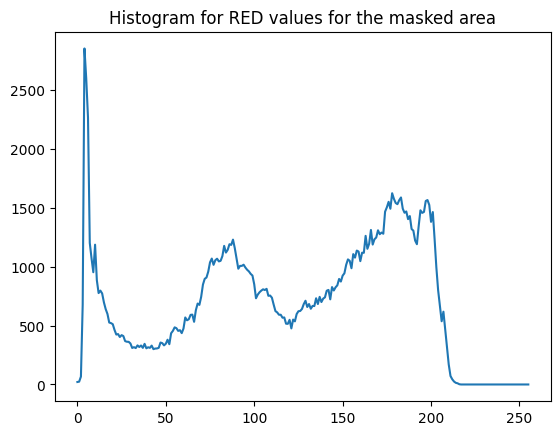

In [6]:
mask_hist_red = cv2.calcHist([masked_img], channels=[2], mask=mask, histSize=[256], ranges=[0, 256])
plt.plot(mask_hist_red)
plt.title("Histogram for RED values for the masked area")

## Histogram Equalization

Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. So you need to stretch this histogram to either ends and that is what histogram equalization does. This normally improves the contrast of the image.

### Single channel image (Grayscale)

#### Loading the grayscale image

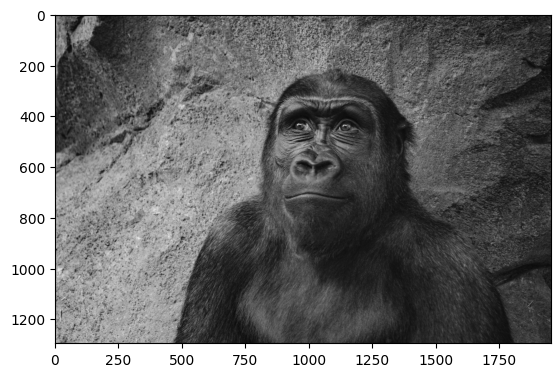

In [7]:
gray_gorilla = cv2.imread("../DATA/gorilla.jpg", 0)
plt.imshow(gray_gorilla, cmap="gray")

#### Plot the histogram

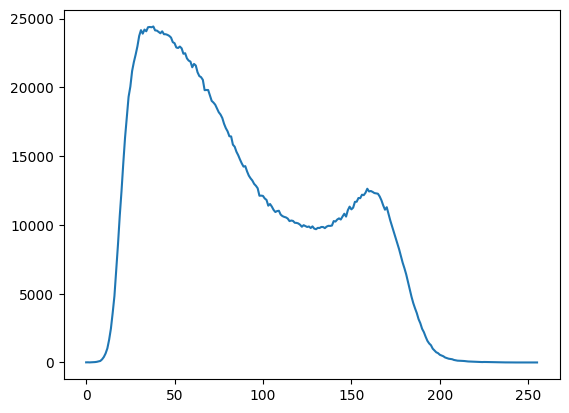

In [8]:
hist_values = cv2.calcHist([gray_gorilla], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.plot(hist_values)

#### Show the equalized image

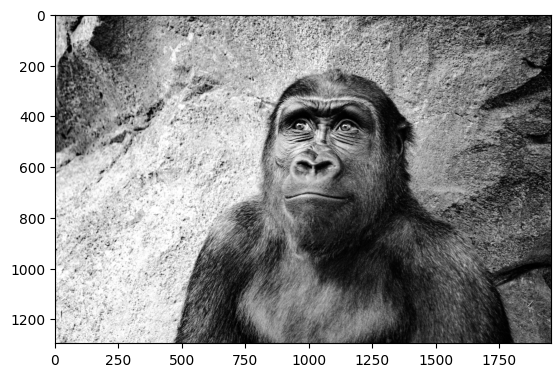

In [9]:
eq_gray_gorilla = cv2.equalizeHist(gray_gorilla)
plt.imshow(eq_gray_gorilla, cmap="gray")

#### Plot the equalized histogram

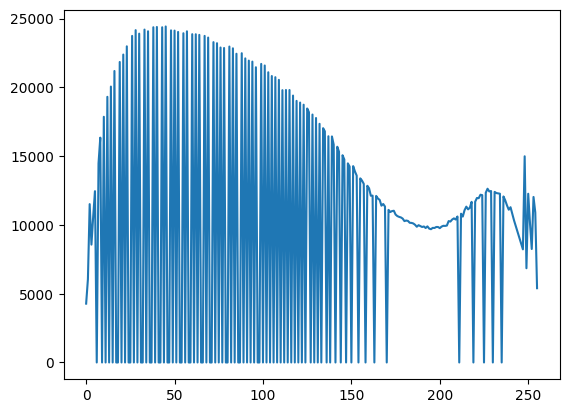

In [10]:
eq_hist_values = cv2.calcHist([eq_gray_gorilla], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.plot(eq_hist_values)

### Three channel image (Color)

#### Load the color image

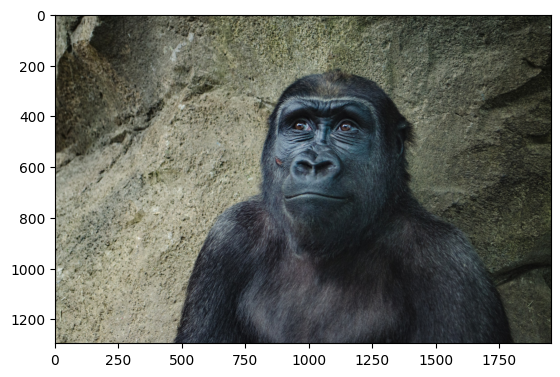

In [11]:
color_gorilla = cv2.imread("../DATA/gorilla.jpg")
rgb_color_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)
hsv_color_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)
plt.imshow(rgb_color_gorilla)

#### Equalize the image

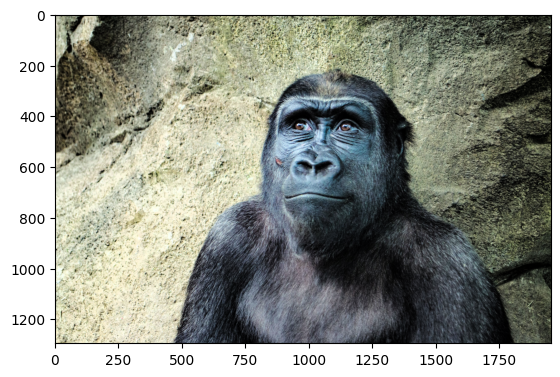

In [12]:
hsv_color_gorilla[:,:,2] = cv2.equalizeHist(hsv_color_gorilla[:,:,2])
rgb_color_gorilla = cv2.cvtColor(hsv_color_gorilla, cv2.COLOR_HSV2RGB)
plt.imshow(rgb_color_gorilla)